# OpenClassrooms - Ingenieur IA
# Projet 3 - OpenFoodFact
# ANALYSE EXPLORATOIRE ET VISUALISATION DES DONNEES


## Objectifs du projet : 
- **Rendre les données de santé publique plus accessibles**
- **Explorer et visualiser les données pour qu'elles soient utilisables**

## Plan :

**A - Synthèse des données :**
- 1 - Récapitulatif des données pertinentes pour l'analyse
- 2 - Volumétrie et structure des données
- 3 - Données interactives
    
**B - Analyse univariée :**
- 1 - Analyse univariée des variables qualitatives
- 2 - Analyse univariée des variables quantitatives
- 3 - Analyse univariée interactive
    
**C - Analyse bivariée :**
- 1 - Variables quantitatives vs Variables quantitatives
    - Analyse des coefficients de corrélations
    - Tests de significativité des coefficients de corrélations
    - Analyse interactive
- 2 - Variables qualitatives vs Variables qualitatives
    - Analyse interactive
- 3 - Variables qualitatives vs Variables quantitatives
    - Analyse interactive
    - Analyse de la variance (ANOVA)
    - Tests de significativité des rapports de corrélation
- 4 - Evolution du nutrition score dans le temps

**D - Analyse multivariée :**
- 1 - Analyse en Composantes Principales (ACP)
    - Eboulis des valeurs propres
    - Cercles des corrélations
    - Projection des individus sur les axes factoriels
    - Contribution des caractéristiques aux composantes
    - Interprétation des deux premiers axes factoriels
    - Représentation des produits dans l'espace des 3 premiers axes factoriels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from wordcloud import WordCloud
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import normaltest
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [2]:
print("Palette de couleurs pour le nutriscore : ")

Palette de couleurs pour le nutriscore : 


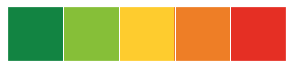

In [3]:
nutriscore_palette = ["#128442", "#86BF38", "#FECC2E", "#EE7E26", "#E52F24"]
sns.set(palette=nutriscore_palette)
sns.palplot(sns.color_palette())

In [4]:
df = pd.read_csv('openfoodfact_cleaned.csv', parse_dates=["created_datetime"], low_memory=False)

In [5]:
data = df.copy()

# A - Synthèse des données

## 1 - Récapitulatif des données pertinentes pour l'analyse
- **Date** : 'created_datetime'
- **Informations produit** : 'product_name', 'brands', 'countries_fr', 'category'
- **Additifs / Huile de palme** : 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'
- **Scores de nutrition** : 'nutrition_grade_fr', 'nutrition_score_fr_100g'
- **Energie (pour 100g)** : 'energy_100g'
- **Nutriments (pour 100g)** : 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'

In [6]:
# Catégorisation des variables pour l'analyse
date = ["created_datetime"]
product_infos = ["product_name", "brands", "countries_fr", "category"]
additives = ["additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]
nutrition_grade = ["nutrition_grade_fr"]
nutrition_score = ["nutrition_score_fr_100g"]
energy = ["energy_100g"]
nutriments = ["fat_100g", "saturated_fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]
num_var = nutrition_score + energy + nutriments
cat_var = product_infos + additives + nutrition_grade

## 2 - Volumétrie et structure des données

In [7]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 114058
Nombre de colonnes : 18


In [8]:
data.head()

created_datetime                           product_name          brands  \
0 2017-03-09 14:32:37                                Peanuts  Torn & Glasser   
1 2017-03-09 10:34:10                          Zen Party Mix        Sunridge   
2 2017-03-09 10:35:06                       Energy Power Mix        Sunridge   
3 2017-03-09 10:34:14  Antioxidant Mix - Berries & Chocolate        Sunridge   
4 2017-03-10 09:34:46              Peanut Butter Power Chews        Sunridge   

  countries_fr  additives_n  ingredients_from_palm_oil_n  \
0   États-Unis          0.0                          0.0   
1   États-Unis          1.0                          0.0   
2   États-Unis          0.0                          0.0   
3   États-Unis          1.0                          0.0   
4   États-Unis          3.0                          0.0   

   ingredients_that_may_be_from_palm_oil_n nutrition_grade_fr  energy_100g  \
0                                      0.0                  b       1941.0   
1                                      0.0                  d       2230.0   
2                                      0.0                  d       1464.0   
3                                      0.0                  d       2092.0   
4                                      0.0                  c       1954.0   

   fat_100g  saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0     17.86                0.00               60.71        17.86         7.1   
1     36.67                5.00               36.67         3.33         6.7   
2     17.50                7.50               42.50        32.50         5.0   
3     33.33                6.67               46.67        30.00         6.7   
4     20.00                2.22               60.00        33.33         4.4   

   proteins_100g  salt_100g  nutrition_score_fr_100g category  
0          17.86    0.63500                     -0.0      NaN  
1          16.67    1.60782                    -12.0      NaN  
2           7.50    0.28448                    -14.0      NaN  
3          13.33    0.46482                    -15.0      NaN  
4           8.89    0.19812                     -9.0      NaN

## 3 - _Données interactives_

### Indicateurs statistiques en fonction du nutriscore

In [9]:
@interact
def intearctive_nutrition_grade(nutriscore=["a", "b", "c", "d", "e"]):
    return data.loc[data['nutrition_grade_fr'] == nutriscore].describe()

interactive(children=(Dropdown(description='nutriscore', options=('a', 'b', 'c', 'd', 'e'), value='a'), Output…

# B - Analyse univariée

## 1 - Analyse univariée des variables qualitatives

### _NutritionGrade_ : variable avec un nombre de modalités peu élevé -> Diagramme de dispersion (Pie Chart)

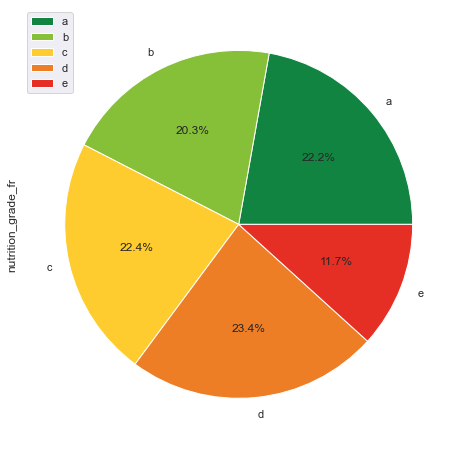

In [10]:
for var in nutrition_grade:
    plt.figure(figsize=(8,8))
    data[var].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
    plt.legend()
    plt.show()

### _Additifs_ : variables avec un nombre de modalités moyen -> Diagramme en bâtons (Bar Plot)

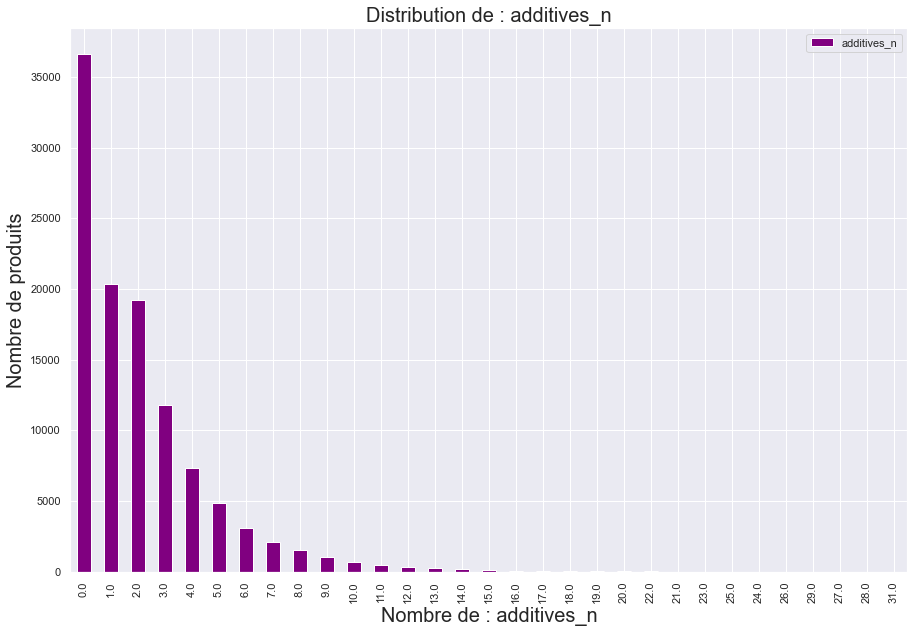

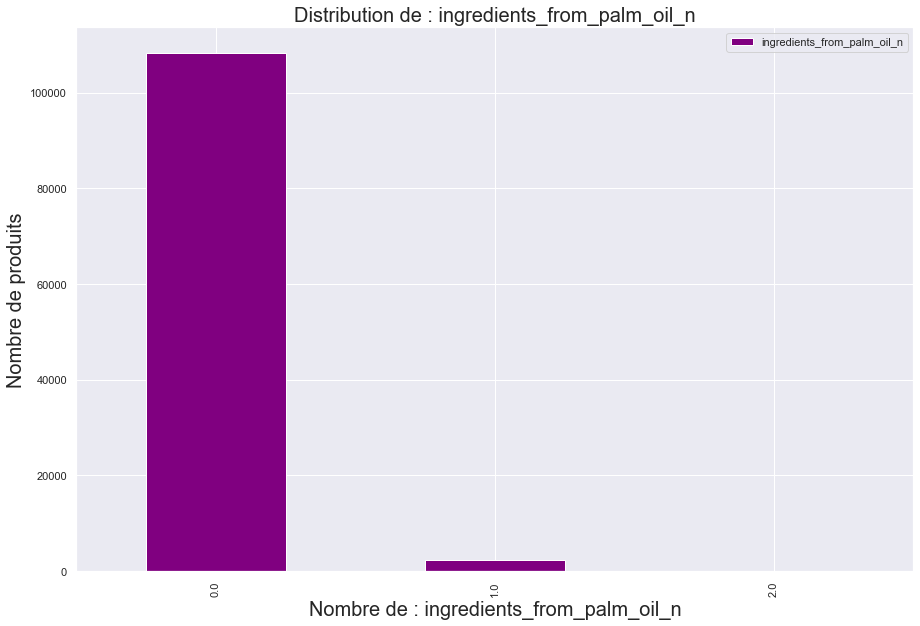

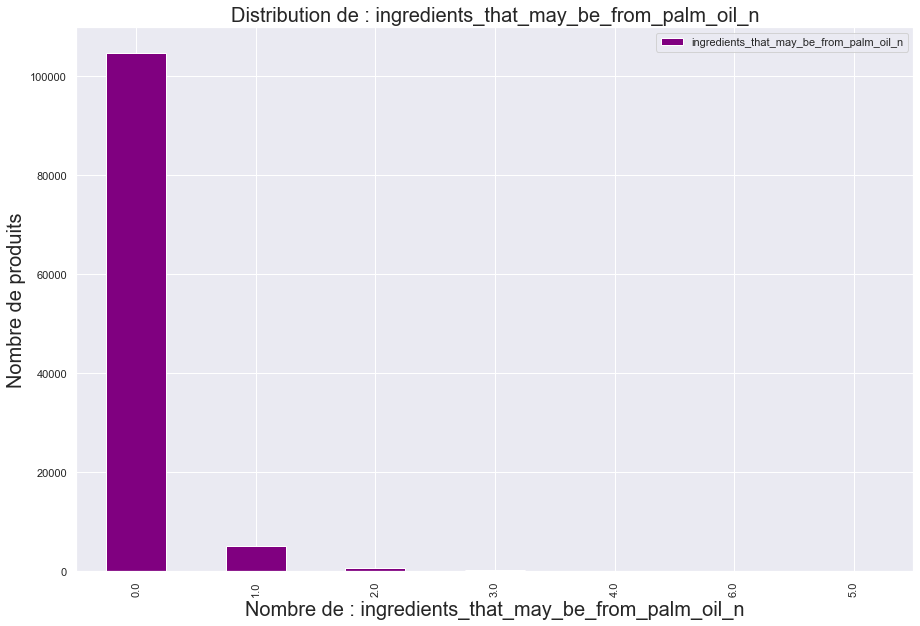

In [11]:
for var in additives:
    plt.figure(figsize=(15,10))
    data[var].value_counts().plot.bar(label=var, color='purple')
    plt.xlabel("Nombre de : " + str(var), fontsize=20)
    plt.ylabel("Nombre de produits", fontsize=20)
    plt.title("Distribution de : " + str(var), fontsize=20)
    plt.legend()
    plt.show()

### _Informations produit_ : variables avec un nombre de modalités élevé -> Nuage de mots (Words Cloud)

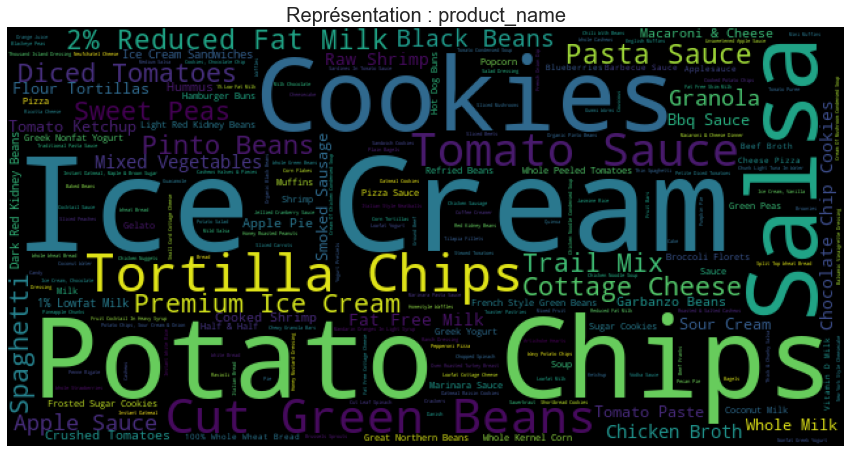

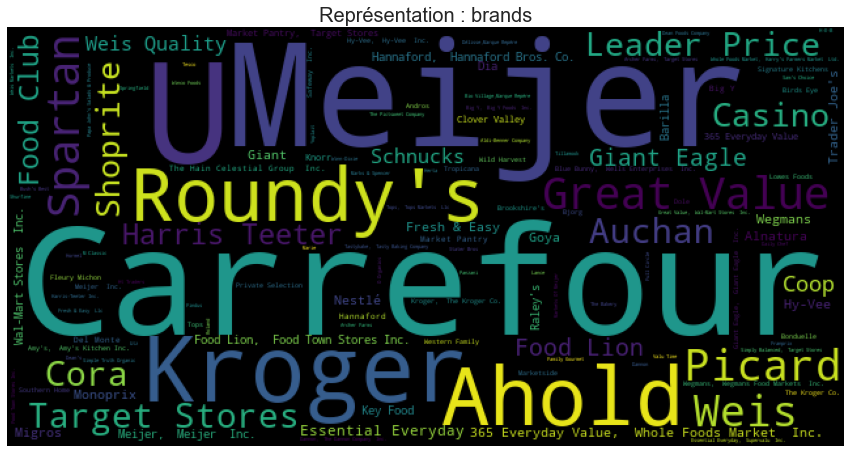

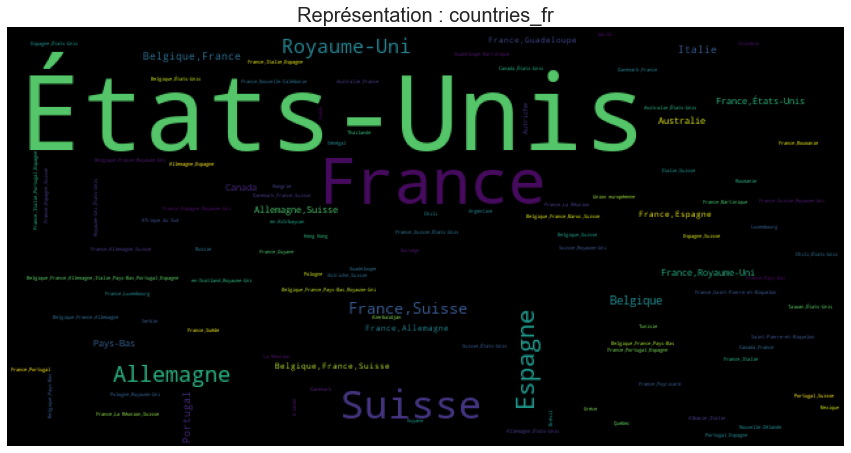

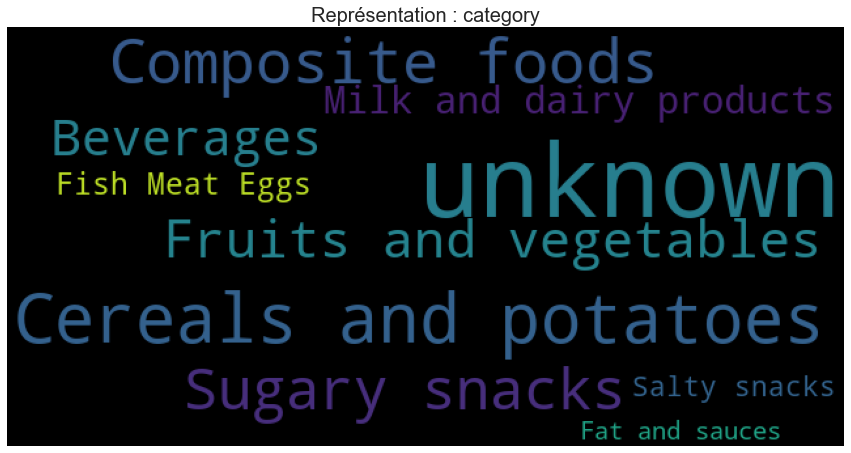

In [12]:
for var in product_infos:
    var_occurences = data[var].value_counts().to_dict()
    wordcloud = WordCloud(width=640, height=320).generate_from_frequencies(var_occurences)
    plt.figure(figsize=(15,10))
    plt.title("Représentation : " + var, fontsize=20)
    plt.imshow(wordcloud)
    _=plt.axis("off")

## 2 - Analyse univariée des variables quantitatives

### Indicateurs

In [13]:
data.describe()

additives_n  ingredients_from_palm_oil_n  \
count  110469.000000                110469.000000   
mean        2.124198                     0.020712   
std         2.641341                     0.144813   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g       fat_100g  \
count                            110469.000000  114058.000000  114058.000000   
mean                                  0.062244     989.732720       9.432490   
std                                   0.283491     686.119486      10.825814   
min                                   0.000000       0.800000       0.000000   
25%                                   0.000000     340.000000       0.740000   
50%                                   0.000000     909.000000       4.900000   
75%                                   0.000000    1569.000000      15.790000   
max                                   6.000000    3515.000000      52.000000   

       saturated_fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       114058.000000       114058.000000  114058.000000  114058.000000   
mean             3.040944           31.900794      11.598080       2.052712   
std              4.061872           26.366376      13.572912       2.129646   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.000000            8.330000       1.750000       0.000000   
50%              1.100000           22.660000       5.000000       1.500000   
75%              4.880000           56.250000      18.600000       3.300000   
max             16.670000          100.000000      52.310000       9.000000   

       proteins_100g      salt_100g  nutrition_score_fr_100g  
count  114058.000000  114058.000000            114058.000000  
mean        6.102126       0.766178                -6.587567  
std         5.183049       0.695001                 8.461231  
min         0.000000       0.000000               -36.000000  
25%         2.000000       0.127000               -13.000000  
50%         5.000000       0.660000                -4.000000  
75%         9.000000       1.191260                -0.000000  
max        21.830000       2.834640                14.000000

## 3 - _Analyse univariée interactive des variables quantitatives_

### Graphiques

In [14]:
@interact
def interactive_hist(col=nutriments):
    plt.figure(figsize=(15, 10))
    plt.hist(data[col], color='purple', bins=30)
    plt.xlabel("Grammes", fontsize=20)
    plt.ylabel("Nombre de produits", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

interactive(children=(Dropdown(description='col', options=('fat_100g', 'saturated_fat_100g', 'carbohydrates_10…

In [15]:
@interact
def interactive_boxplot(col=num_var):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=data, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

interactive(children=(Dropdown(description='col', options=('nutrition_score_fr_100g', 'energy_100g', 'fat_100g…

In [16]:
@interact
def interactive_violinplot(col=num_var):
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=col, data=data, color='purple')
    plt.title("Violinplot pour : " + str(col), fontsize=15)
    plt.show()

interactive(children=(Dropdown(description='col', options=('nutrition_score_fr_100g', 'energy_100g', 'fat_100g…

# C - Analyse bivariée

## 1 - Variables quantitatives vs Variables quantitatives 

### Indicateurs

#### Analyse des coefficients de correlation

In [17]:
correlations = data[num_var].corr()
correlations

nutrition_score_fr_100g  energy_100g  fat_100g  \
nutrition_score_fr_100g                 1.000000    -0.638338 -0.684848   
energy_100g                            -0.638338     1.000000  0.754154   
fat_100g                               -0.684848     0.754154  1.000000   
saturated_fat_100g                     -0.767127     0.572603  0.741890   
carbohydrates_100g                     -0.357408     0.782870  0.221540   
sugars_100g                            -0.605298     0.448647  0.236647   
fiber_100g                              0.111281     0.415471  0.202178   
proteins_100g                          -0.064855     0.386039  0.297607   
salt_100g                              -0.404524     0.246621  0.310096   

                         saturated_fat_100g  carbohydrates_100g  sugars_100g  \
nutrition_score_fr_100g           -0.767127           -0.357408    -0.605298   
energy_100g                        0.572603            0.782870     0.448647   
fat_100g                           0.741890            0.221540     0.236647   
saturated_fat_100g                 1.000000            0.181876     0.361262   
carbohydrates_100g                 0.181876            1.000000     0.526387   
sugars_100g                        0.361262            0.526387     1.000000   
fiber_100g                         0.007772            0.426774     0.075001   
proteins_100g                      0.206731            0.142602    -0.169135   
salt_100g                          0.150002            0.036684    -0.178448   

                         fiber_100g  proteins_100g  salt_100g  
nutrition_score_fr_100g    0.111281      -0.064855  -0.404524  
energy_100g                0.415471       0.386039   0.246621  
fat_100g                   0.202178       0.297607   0.310096  
saturated_fat_100g         0.007772       0.206731   0.150002  
carbohydrates_100g         0.426774       0.142602   0.036684  
sugars_100g                0.075001      -0.169135  -0.178448  
fiber_100g                 1.000000       0.237576   0.032104  
proteins_100g              0.237576       1.000000   0.290911  
salt_100g                  0.032104       0.290911   1.000000

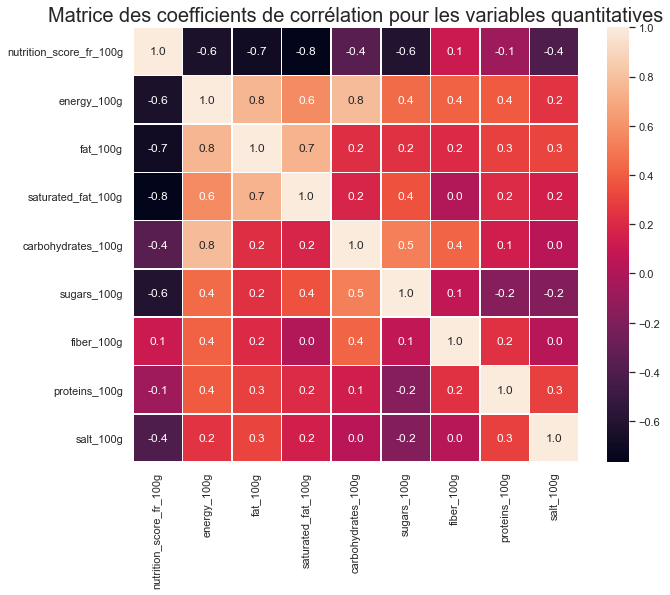

In [18]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Matrice des coefficients de corrélation pour les variables quantitatives", fontsize=20)
plt.show()

#### L'intensité des corrélations entre les variables suivantes est élevée (en valeur absolue) :
- Corrélation positive (coefficient de corrélation > 0.7) :
    - 'energy_100g' et 'fat_100g'
    - 'energy_100g' et 'carbohydrates_100g'
    - 'fat_100g' et 'saturated_fat_100g'
    
    
- Corrélation négative (coefficient de corrélation < -0.7) :
    - 'nutrition_score_fr_100g' et 'fat_100g'
    - 'nutrition_score_fr_100g' et 'saturated_fat_100g'

#### -> Nous allons tester la significativité de ces coefficients de corrélation

In [19]:
data_correls = data.dropna()

#### Préalable : on teste la normalité des variables :
- Si les variables sont distribuées selon une loi normale -> on peut utiliser un test paramétrique (test de PEARSON)
- Si les variables ne sont pas distribuées selon une loi normale -> on doit utiliser un test non-paramétrique (test de SPREARMAN)


- Hypothèse nulle **H0** : la variables **est distribuée selon une loi normale**
- Hypothèse alternative **H1** : la variable **n'est pas distribuée selon une loi normale**
- *Seuil fixé à 5%*

#### *- Test de normalité de la variable : 'energy_100g'*

In [20]:
stat, p = normaltest(data_correls['energy_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La variable est distribuée selon une loi normale à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%


#### *- Test de normalité de la variable : 'fat_100g'*

In [21]:
stat, p = normaltest(data_correls['fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La variable est distribuée selon une loi normale à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%


#### *- Test de normalité de la variable : 'carbohydrates_100g'*

In [22]:
stat, p = normaltest(data_correls['carbohydrates_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La variable est distribuée selon une loi normale à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%


#### *- Test de normalité de la variable : 'saturated_fat_100g'*

In [23]:
stat, p = normaltest(data_correls['saturated_fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La variable est distribuée selon une loi normale à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%


#### *- Test de normalité de la variable : 'nutrition_score_fr_100g'*

In [24]:
stat, p = normaltest(data_correls['nutrition_score_fr_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La variable est distribuée selon une loi normale à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La variable n'est pas distribuée selon une loi normale à un seuil de 5%


#### Conclusion : les variables ne sont pas distribuées selon une loi normale à un seuil de 5%
#### -> Nous allons utiliser un test non-paramétrique : *Test de SPREARMAN*

#### Tests de la significativité des coefficients de corrélation : _test de SPEARMAN_
- Hypothèse nulle **H0** : les 2 variables sont **indépendantes**
- Hypothèse alternative **H1** : les 2 variables sont **liées**
- *Seuil fixé à 5%*

#### *- Test de significativité de la corrélation positive entre : 'energy_100g' et 'fat_100g'*

In [25]:
correl, p = spearmanr(data_correls['energy_100g'], data_correls['fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La corrélation positive n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%


#### *- Test de significativité de la corrélation positive entre : 'energy_100g' et 'carbohydrates_100g'*

In [26]:
correl, p = spearmanr(data_correls['energy_100g'], data_correls['carbohydrates_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La corrélation positive n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%


#### *- Test de significativité de la corrélation positive entre : 'fat_100g' et 'saturated_fat_100g'*

In [27]:
correl, p = spearmanr(data_correls['fat_100g'], data_correls['saturated_fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La corrélation positive n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La corrélation positive est statistiquement significative à un seuil de 5%


#### *- Test de significativité de la corrélation négative entre : 'nutrition_score_fr_100g' et 'fat_100g'*

In [28]:
correl, p = spearmanr(data_correls['nutrition_score_fr_100g'], data_correls['fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La corrélation négative n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La corrélation négative est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La corrélation négative est statistiquement significative à un seuil de 5%


#### *- Test de significativité de la corrélation négative entre : 'nutrition_score_fr_100g' et 'saturated_fat_100g'*

In [29]:
correl, p = spearmanr(data_correls['nutrition_score_fr_100g'], data_correls['saturated_fat_100g'])
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La corrélation négative n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La corrélation négative est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La corrélation négative est statistiquement significative à un seuil de 5%


#### Conclusion : tous les coefficients de corrélation étudiés sont statistiquement significatifs avec un niveau de risque fixé à 5%

### _Analyse interactive_

### Graphiques

#### Diagramme de dispersion : analyse de la relation entre deux variables quantitatives et le score de nutrition

In [30]:
@interact
def interactive_scatterplot(variable1=num_var, variable2=num_var):
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=variable1, y=variable2, hue="nutrition_grade_fr", 
                data=data, hue_order=["a", "b", "c", "d", "e"], alpha=0.1)
    plt.title("")
    plt.show()

interactive(children=(Dropdown(description='variable1', options=('nutrition_score_fr_100g', 'energy_100g', 'fa…

#### Diagramme en ligne : analyse de la relation entre deux variables quantitatives incluant la variance des variables

In [31]:
@interact
def interactive_lineplot(variable1=num_var, variable2=num_var):
    plt.figure(figsize=(15,10))
    sns.lineplot(x=variable1, y=variable2, data=data, color='purple')
    plt.show()

interactive(children=(Dropdown(description='variable1', options=('nutrition_score_fr_100g', 'energy_100g', 'fa…

#### Diagramme joint : analyse des distributions croisée de deux variables quantitatives

In [32]:
@interact
def interactive_jointplot(variable1=num_var, variable2=num_var):
    g=sns.jointplot(x=variable1, y=variable2, data=data, kind='reg', color='purple')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(10)
    plt.show()

interactive(children=(Dropdown(description='variable1', options=('nutrition_score_fr_100g', 'energy_100g', 'fa…

## 2 - Variables qualitatives vs Variables qualitatives 

### _Analyse interactive_

#### Visualisation des variables qualitatives en fonction de la variable qualitative 'Nutrition_grade_fr'

In [33]:
quali_choice = ["category", "additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]
@interact
def interactive_countplot(variable=quali_choice):
    plt.figure(figsize=(15,10))
    sns.countplot(data=data, x="nutrition_grade_fr", hue=variable, order=["a","b","c","d","e"])
    plt.title(f"Effectifs des produits pour chaque {variable} par nutriscore", fontsize=20)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('category', 'additives_n', 'ingredients_from_p…

#### Visualisation des variables qualitatives en fonction de la variable qualitative 'Category'

In [34]:
quali_choice = ["additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]
@interact
def interactive_countplot(variable=quali_choice):
    plt.figure(figsize=(15,10))
    g=sns.countplot(data=data, x="category", hue=variable)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.title(f"Effectifs des produits pour chaque {variable} par catégorie de produit", fontsize=20)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('additives_n', 'ingredients_from_palm_oil_n', …

## 3 - Variables qualitatives vs Variables quantitatives

### _Analyse interactive_

#### Visualisation des variables quantitatives en fonction de la variable qualitative 'Nutrition_grade_fr'

In [35]:
@interact
def interactive_boxplot(variable=num_var):
    plt.figure(figsize=(15,10))
    sns.boxplot(x="nutrition_grade_fr", y=variable, data=data, order=["a","b","c","d","e"])
    plt.show()

interactive(children=(Dropdown(description='variable', options=('nutrition_score_fr_100g', 'energy_100g', 'fat…

#### Visualisation des variables quantitatives en fonction de la variable qualitative 'Category'

In [36]:
@interact
def interactive_boxplot(variable=num_var):
    plt.figure(figsize=(15,10))
    g=sns.boxplot(x="category", y=variable, data=data)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('nutrition_score_fr_100g', 'energy_100g', 'fat…

#### Visualisation des variables quantitatives en fonction des variables qualitatives 'Additives'

In [37]:
@interact
def interactive_boxplot(additive=additives, nutriment=nutriments):
    plt.figure(figsize=(15,10))
    sns.boxplot(x=additive, y=nutriment, data=data)
    plt.show()

interactive(children=(Dropdown(description='additive', options=('additives_n', 'ingredients_from_palm_oil_n', …

### Analyse de la variance (ANOVA)

#### 1 - Données

In [38]:
#On ne prend que les données non manquantes pour l'analyse
data_anova = data.dropna()
data_size_anova = data_anova.shape
nb_rows_anova = data_size_anova[0]
nb_columns_anova = data_size_anova[1]
print("Volumétrie des données pour l'ANOVA : ")
print(f"Nombre de lignes : {nb_rows_anova}")
print(f"Nombre de colonnes : {nb_columns_anova}")

Volumétrie des données pour l'ANOVA : 
Nombre de lignes : 24469
Nombre de colonnes : 18


In [39]:
# variable qualitatives :
quali_var_anova = ["category"] + additives + nutrition_grade

# variables quantitatives :
quanti_var_anova = num_var

#### 2 - Calcul des rapports de corrélation entre une variable qualitative et une variable quantitative. 
#### _-> Décomposition de la variance_

In [40]:
#Calcul du rapport de corrélation (coefficient de détermination) entre une variable qualitative et une variable quantitative = taux de variance expliquée

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [41]:
#Calul interactif
@interact
def interactive_anova(var_quanti=quanti_var_anova, var_quali=quali_var_anova):
    eta_sq = eta_squared(data_anova[var_quali], data_anova[var_quanti])
    print(f"Rapport de Correlation = {eta_sq:.2f}")
    print(f"-> Les variables {var_quanti} et {var_quali} sont liées à hauteur de {eta_sq:.2f}")
    print(f"-> La variance de la variable {var_quanti} est expliquée à {eta_sq:.2f} par la variable {var_quali}")

interactive(children=(Dropdown(description='var_quanti', options=('nutrition_score_fr_100g', 'energy_100g', 'f…

#### 3 - Matrice des rapports de corrélation

In [42]:
mat_eta_sq = np.empty(shape=[len(quali_var_anova), len(quanti_var_anova)])

#Construction de la matrice de Rapports de correlation entre les variables = matrice de variance expliquée
for i in range(0, len(quali_var_anova)):
    for j in range(0, len(quanti_var_anova)):
        mat_eta_sq[i,j] = eta_squared(data_anova[quali_var_anova[i]], data_anova[quanti_var_anova[j]])
        
#Construction du DataFrame correspondant
df_anova = pd.DataFrame(mat_eta_sq, index = quali_var_anova, columns = quanti_var_anova)
df_anova.head()

nutrition_score_fr_100g  energy_100g  \
category                                                0.430064     0.604046   
additives_n                                             0.172033     0.036558   
ingredients_from_palm_oil_n                             0.110539     0.092711   
ingredients_that_may_be_from_palm_oil_n                 0.044725     0.032580   
nutrition_grade_fr                                      0.900693     0.252206   

                                         fat_100g  saturated_fat_100g  \
category                                 0.395708            0.304720   
additives_n                              0.058998            0.080248   
ingredients_from_palm_oil_n              0.063516            0.123255   
ingredients_that_may_be_from_palm_oil_n  0.026100            0.034149   
nutrition_grade_fr                       0.363086            0.480751   

                                         carbohydrates_100g  sugars_100g  \
category                                           0.623011     0.458541   
additives_n                                        0.014859     0.081245   
ingredients_from_palm_oil_n                        0.062724     0.077776   
ingredients_that_may_be_from_palm_oil_n            0.019728     0.015567   
nutrition_grade_fr                                 0.080610     0.296508   

                                         fiber_100g  proteins_100g  salt_100g  
category                                   0.369782       0.512053   0.337796  
additives_n                                0.007505       0.006909   0.048996  
ingredients_from_palm_oil_n                0.014869       0.001731   0.001956  
ingredients_that_may_be_from_palm_oil_n    0.000695       0.000837   0.012639  
nutrition_grade_fr                         0.065571       0.020236   0.110507

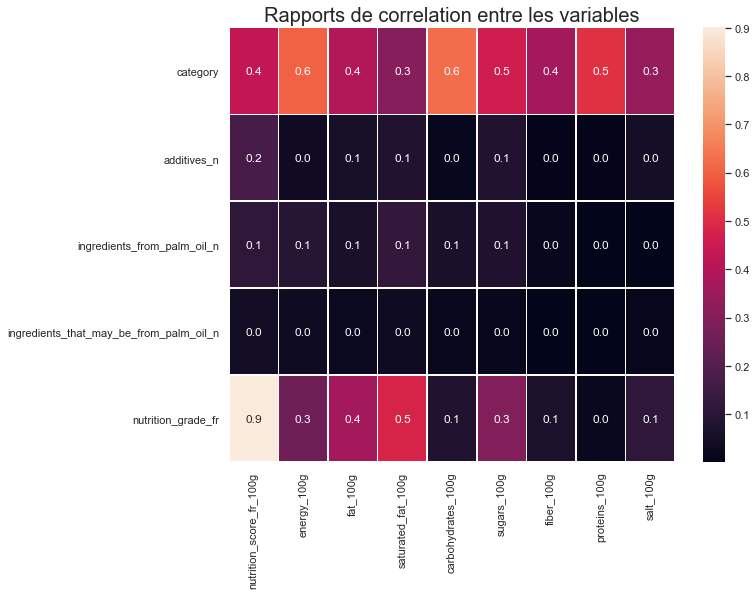

In [43]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_anova, annot=True, linewidths=.5, fmt= '.01f',ax=ax)
plt.title("Rapports de correlation entre les variables", fontsize=20)
plt.show()

#### Les variables suivantes semblent être liées (rapports de corrélation > 0.6) :
- 'nutrition_score_fr_100g' et 'nutrition_grade_fr'
- 'energy_100g' et 'category'
- 'carbohydrates_100g' et 'category'

#### -> Nous allons tester la significativité de ces liaisons

#### 4 - Tests statistiques de significativité des rapports de corrélation :

- Hypothèse nulle **H0** : toutes les moyennes sont **égales** (-> la dépendance n'est pas significative)
- Hypothèse alternative **H1** : au moins une moyenne est **différente** (-> la dépendance est significative)
- *Seuil fixé à 5%*

#### *- Test statistique de la significativité de la liaison entre la variable 'nutrition_score_fr_100g' et la variable 'nutrition_grade_fr'*

In [44]:
list_nutri_a = data_anova[data_anova['nutrition_grade_fr'] == 'a']['nutrition_score_fr_100g']
list_nutri_b = data_anova[data_anova['nutrition_grade_fr'] == 'b']['nutrition_score_fr_100g']
list_nutri_c = data_anova[data_anova['nutrition_grade_fr'] == 'c']['nutrition_score_fr_100g']
list_nutri_d = data_anova[data_anova['nutrition_grade_fr'] == 'd']['nutrition_score_fr_100g']
list_nutri_e = data_anova[data_anova['nutrition_grade_fr'] == 'e']['nutrition_score_fr_100g']

coeff_det, p = kruskal(list_nutri_a, list_nutri_b, list_nutri_c, list_nutri_d, list_nutri_e)
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La liaison entre les 2 variables n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%


#### *- Test statistique de la significativité de la liaison entre la variable 'energy_100g' et la variable 'category'*

In [45]:
list_unknown = data_anova[data_anova['category'] == 'unknown']['energy_100g']
list_cereals = data_anova[data_anova['category'] == 'Cereals and potatoes']['energy_100g']
list_composite = data_anova[data_anova['category'] == 'Composite foods']['energy_100g']
list_sugary = data_anova[data_anova['category'] == 'Sugary snacks']['energy_100g']
list_fruits = data_anova[data_anova['category'] == 'Fruits and vegetables']['energy_100g']
list_beverages = data_anova[data_anova['category'] == 'Beverages']['energy_100g']
list_milk = data_anova[data_anova['category'] == 'Milk and dairy products']['energy_100g']
list_fish = data_anova[data_anova['category'] == 'Fish Meat Eggs']['energy_100g']
list_salty = data_anova[data_anova['category'] == 'Salty snacks']['energy_100g']
list_fat = data_anova[data_anova['category'] == 'Fat and sauces']['energy_100g']

coeff_det, p = kruskal(list_unknown, list_cereals, list_composite, list_sugary, list_fruits, list_beverages, list_milk, list_fish, list_salty, list_fat)
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La liaison entre les 2 variables n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%


#### *- Test statistique de la significativité de la liaison entre la variable 'carbohydrates_100g' et la variable 'category'*

In [46]:
list_unknown = data_anova[data_anova['category'] == 'unknown']['carbohydrates_100g']
list_cereals = data_anova[data_anova['category'] == 'Cereals and potatoes']['carbohydrates_100g']
list_composite = data_anova[data_anova['category'] == 'Composite foods']['carbohydrates_100g']
list_sugary = data_anova[data_anova['category'] == 'Sugary snacks']['carbohydrates_100g']
list_fruits = data_anova[data_anova['category'] == 'Fruits and vegetables']['carbohydrates_100g']
list_beverages = data_anova[data_anova['category'] == 'Beverages']['carbohydrates_100g']
list_milk = data_anova[data_anova['category'] == 'Milk and dairy products']['carbohydrates_100g']
list_fish = data_anova[data_anova['category'] == 'Fish Meat Eggs']['carbohydrates_100g']
list_salty = data_anova[data_anova['category'] == 'Salty snacks']['carbohydrates_100g']
list_fat = data_anova[data_anova['category'] == 'Fat and sauces']['carbohydrates_100g']

coeff_det, p = kruskal(list_unknown, list_cereals, list_composite, list_sugary, list_fruits, list_beverages, list_milk, list_fish, list_salty, list_fat)
print(f"Valeur_p = {p:.3f}")
if p > 0.05:
    print("-> On ne peux pas rejeter H0 : La liaison entre les 2 variables n'est pas statistiquement significative à un seuil de 5%")
else:
    print("-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%")

Valeur_p = 0.000
-> On peut rejetter H0 : La liaison entre les 2 variables est statistiquement significative à un seuil de 5%


#### Conclusion : tous les rapports de corrélation étudiés sont statistiquement significatifs avec un risque de première espèce fixé à 5%

## 4 - Evolution du nutriscore dans le temps

In [47]:
data["date"] = data["created_datetime"].dt.date

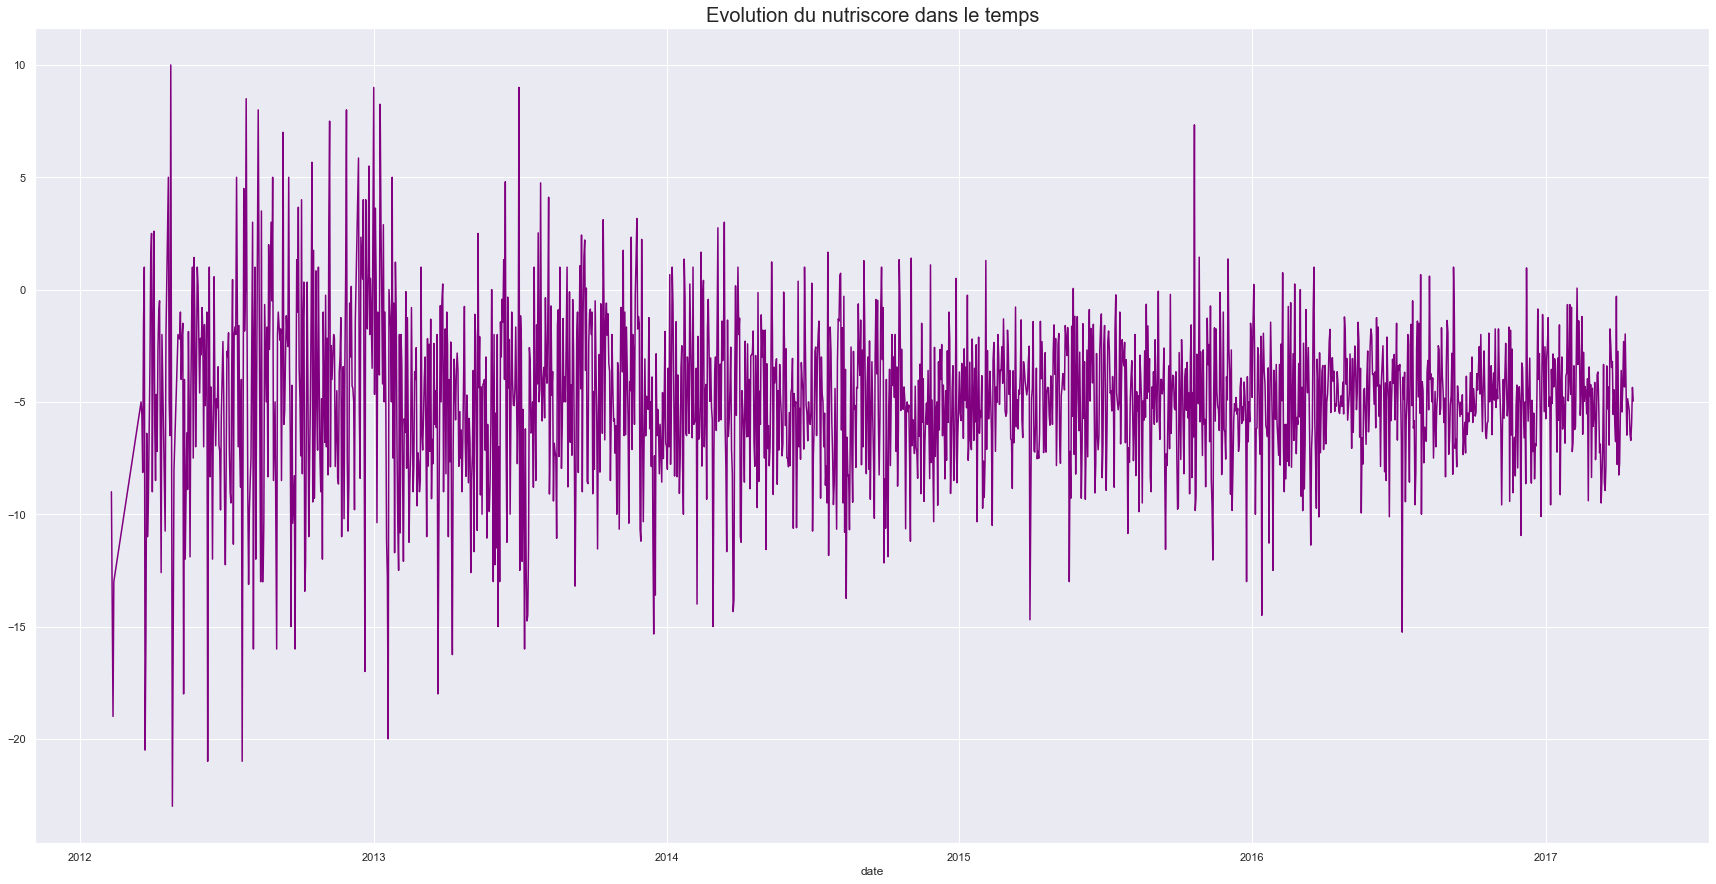

In [48]:
plt.figure(figsize=(30,15))
data.groupby("date")["nutrition_score_fr_100g"].mean().plot(c='purple')
plt.title("Evolution du nutriscore dans le temps", fontsize=20)
plt.show()

In [49]:
data.drop(columns=["date"], inplace=True)


# D - Analyse multivariée

## 1 - Analyse en Composantes Principales (ACP)

In [50]:
# choix des variables pour l'analyse
var_hue = "nutrition_grade_fr"
var_pca = nutriments + energy + nutrition_score
var_total = var_pca + [var_hue]

# choix du nombre de composantes à calculer
n_comp = 6

# suppression des valeurs manquantes
data_total = data.dropna()

# selection des colonnes à prendre en compte dans l'ACP
data_total = data_total[var_total]

# sauvegarde des noms de la variable 'hue' (variable illustrative) pour l'affichage
names = data_total[var_hue]

# suppresion de la colonne de la variable 'hue'
data_pca = data_total.drop(columns=[var_hue])

# préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

###  Eboulis des valeurs propres

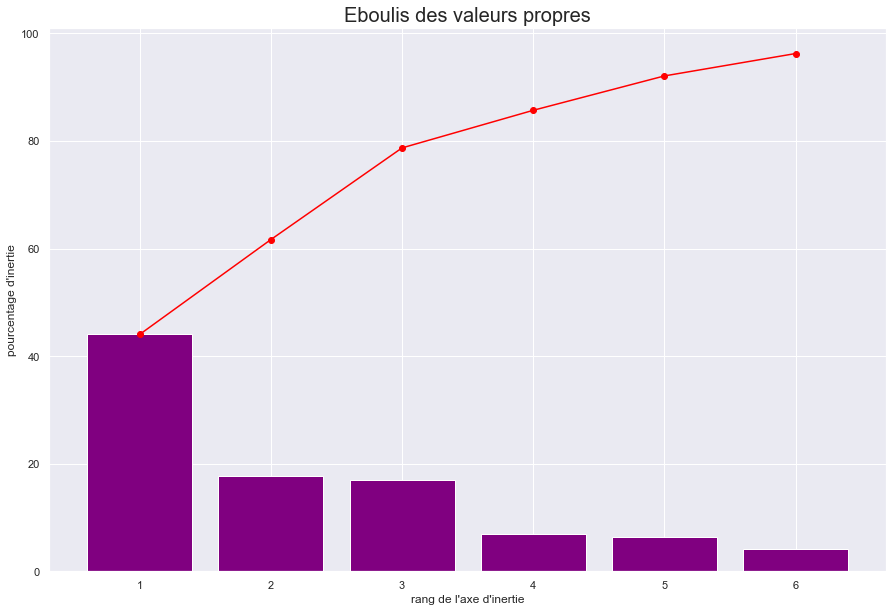

In [51]:
# Affichage de l' Eboulis des valeurs propres
display_scree_plot(pca)

###  Cercle des correlations

In [52]:
# Affichage interactif des Cercles des corrélations
@interact
def interactive_correlation_circles(nb_axes=[2, 4, 6]):
    print("Liaison entre les variables / Synthétisation des variables :")
    pcs = pca.components_
    if nb_axes==2:
        display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
    elif nb_axes==4:
        display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))
    else:
        display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

interactive(children=(Dropdown(description='nb_axes', options=(2, 4, 6), value=2), Output()), _dom_classes=('w…

### Projection des individus sur plan factoriel

In [53]:
# Affichage interactif de la Projection des individus
@interact
def interactive_factorial_planes(nb_axes=[2, 4, 6]):
    print("Profils des produits :")
    X_projected = pca.transform(X_scaled)
    if nb_axes==2:
        display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=names, alpha=0.3)
    elif nb_axes==4:
        display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var=names, alpha=0.3)
    else:
        display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var=names, alpha=0.3)

interactive(children=(Dropdown(description='nb_axes', options=(2, 4, 6), value=2), Output()), _dom_classes=('w…

### Contribution des caractéristiques aux composantes

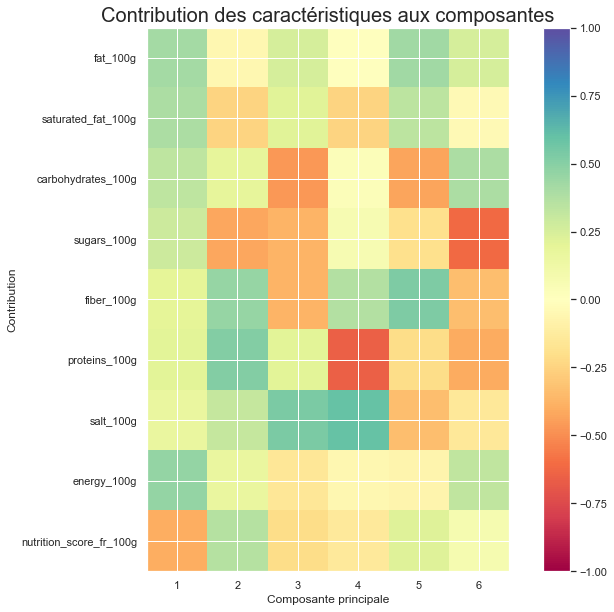

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(
   pca.components_.T,
   cmap='Spectral',
   vmin=-1,
   vmax=1)
plt.yticks(range(len(data_pca.columns)), data_pca.columns)
plt.xticks(range(6), range(1,7))
plt.xlabel("Composante principale")
plt.ylabel("Contribution")
plt.title("Contribution des caractéristiques aux composantes", fontsize=20)
plt.colorbar()
plt.show()

### Interprétation des deux premiers axes factoriels :
#### Axe F1 : 
- tous les nutriments et l'énergie sont positivement corrélés à la variable F1. La corrélation la plus élevée est avec l'énergie et ensuite le gras
- le nutriscore est négativement corrélé à la variable F1
#### -> on peut interpréter l'axe F1 comme représentant la valeur énérgétique

#### Axe F2 :
- les variables ayant les corrélations positives les plus élevées avec à la variable F2 sont les fibres et les protéines, 2 nutriments qui sont bons pour la santé
- le nutriscore est également positivement corrélé à la variable F2
- les variables ayant les corrélations négatives les plus élevées (en valeur absolue) avec la variable F2 sont le gras saturé et le sucre, 2 nutriments qui sont mauvais pour la santé
#### -> on peut interpréter l'axe F2 comme représentant les bénéfices sur la santé

#### On retrouve cette interprétation sur le graphique de la projection des individus sur les axes factoriels F1 et F2

### Représentation interactive des produits dans l'espace des 3 premiers axes factoriels

In [55]:
X_projected = pca.transform(X_scaled)
d = {'F1': X_projected[:, 0], 'F2':  X_projected[:, 1], 'F3':  X_projected[:, 2]}
df_scatter3d = pd.DataFrame(data=d)

In [56]:
fig = px.scatter_3d(df_scatter3d, x="F1", y="F2", z="F3", 
                    color=names[:], 
                    color_discrete_map = {"a": nutriscore_palette[0], "b": nutriscore_palette[1], "c": nutriscore_palette[2], "d": nutriscore_palette[3], "e": nutriscore_palette[4]},
                    opacity = 1,
                    width = 1000,
                    height = 1000,
                    title="Représentation des produits dans l'espace des 3 premiers axes factoriels")
fig.show()